# <center>**Improving Employee Retention by Predicting Employee Attrition Using Machine Learning 💼📊**</center>

---

<h2><center>Author: Bintang Phylosophie</center></h2>

# **Dataset**

## Dataset Information
The dataset contains employee attrition information from  a fictional company from 2006 to 2020. 


## Attribute Information
### Project Overview
Human resource (HR) is the key asset that needs effective management to helpcompanies achieve their business goals. In this project, we are faced with an issue related to human resources within a company. Our focus is to understand how retain employees to prevent the swelling of recrutmnt and training costs for new hires. By identifying factors causing employees to leave, we can promply address these concerns by creating relevant employee programs.
### Identifier
`Username` and `EnterpriseID` is unique ID that each of which is an ID for each employee.
### Target
`StatusKerja` has extracted from `TanggalResign`. If `TanggalResign` contain a datetime value, it is indicated that the employee already resign. And NaN value indicated is an employee is still working in the company.

<br>

Later `StatusKerja` will be categorized as Masih Bekerja (still working) and Tidak Bekerja (resigned).

### Company Goals
Enhance Employee Retention: Strengthen strategies to retain employees and reduce turnover.
Leverage Data for Decision-Making: Use historical employee data to gain insights into attrition trends.
Implement Predictive Analytics: Develop models to anticipate resignations and enable proactive interventions.

### Problems
Employee attrition threatens organizational stability, productivity, and long-term growth. Data indicates a sharp rise in resignations, particularly in 2018, alongside a declining trend in new hires. This imbalance underscores the need for proactive retention strategies to mitigate turnover.

### Objectives
To achieve these goals, this project will:

1. Analyze Employee Data: Examine historical trends, employee attributes, and resignation patterns to uncover key drivers of turnover.
2. Generate Actionable Insights: Identify factors influencing retention and recommend strategies for improvement.
3. Develop Predictive Models: Create data-driven models to forecast resignations and help the company address employee concerns proactively.

<br>

The process will go through the following steps to achieve the objectives:
1. Data Understanding
2. Data Preprocessing
3. Feature Engineering
4. Insight
5. Exploratory Data Analysis
6. Data Preparation
7. Machine Learning

## Libraries and Tools:
For this project, you will need a variety of libraries and tools, including but not limited to:

* **Python**: The primary programming language for data analysis and machine learning.
* **NumPy and Pandas**: For data manipulation and analysis.
* **Scikit-Learn**: To build and evaluate machine learning models.
* **Matplotlib and Seaborn**: For data visualization.
Natural Language Processing (NLP) Libraries (e.g., NLTK or SpaCy) for text analysis in resignation letters.
* **Jupyter Notebooks**: For interactive data exploration and model development.
* **GitHub** for collaboration and code management. Also to keep track of project progress, document the work, and collaborate with HR and relevant departments to ensure the model aligns with the company's goals and policies.

# **Import Library📚**

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
import plotly.express as px


# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

#Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate


# **Data Understanding**

First we load the dataset and start basic data analysis about the features.

In [3]:
# Load the dataset
link = 'https://docs.google.com/spreadsheets/d/1EQlE-TUc06O1-HBRP-siI3ZV_4g48-68/export?format=csv&gid=1577557022'
df = pd.read_csv(link)

In [4]:
print('shape of the data:', df.shape)
df.sample()

shape of the data: (287, 25)


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
101,lazyPorpoise0,100957,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Kurang,Jakarta Pusat,Google_Search,...,+6281937385xxx,lazyPorpoise0172@yahoo.com,Sarjana,1,NaN,masih_bekerja,1976-09-22,2011-2-21,2014-02-01,-


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

 There are 287 rows and 25 columns in the dataset. the columns itself is enough for us to exactly performing the model, but since there is still a slight problem like there is still missing values that we have to handle and unsuitable columns with the data type.

In [6]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

In [7]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
159,peskyJaguar5,110665,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Selatan,Indeed,...,+6289950860xxx,peskyJaguar5956@icloud.com,Sarjana,1,1.0,masih_bekerja,1988-11-08,2011-01-10,2020-1-27,-
175,giddyMandrill6,101274,Menikah,Pria,FullTime,Product Design (UI & UX),Mid_level,Biasa,Jakarta Utara,Employee_Referral,...,+6281272430xxx,giddyMandrill6475@gmail.com,Sarjana,1,1.0,jam_kerja,1983-03-28,2013-04-01,2017-03-06,2019-9-26
211,affectedLemur7,100692,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,...,+6285717696xxx,affectedLemur7726@yahoo.com,Sarjana,1,NaN,leadership,1989-08-25,2014-07-07,2020-2-25,2017-11-15
168,abjectRuffs3,101652,Bercerai,Pria,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Timur,Indeed,...,+6283157914xxx,abjectRuffs3176@proton.com,Sarjana,1,1.0,tidak_bahagia,1987-10-24,2017-4-20,2020-01-02,2020-9-26
87,peskyPudding8,110423,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Diversity_Job_Fair,...,+6289859069xxx,peskyPudding8206@hotmail.com,Sarjana,1,NaN,masih_bekerja,1987-11-24,2008-10-27,2020-1-15,-


## check overall data condition

In [8]:
# checking overal condition of dataframe
def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

,Column Name,%null,dtype,count,nunique,mode,unique value
0,Username,0%,object,287,285,"[boredEggs0, brainyMagpie7]","[boredEggs0, brainyMagpie7, spiritedPorpoise3,..."
1,EnterpriseID,0%,int64,287,287,"[100282, 100301, 100309, 100317, 100326, 10033...","[111065, 106008, 100869, 101560, 100874, 10575..."
2,StatusPernikahan,0%,object,287,5,[Belum_menikah],"[Belum_menikah, Menikah, Lainnya, Bercerai, -]"
3,JenisKelamin,0%,object,287,2,[Wanita],"[Wanita, Pria]"
4,StatusKepegawaian,0%,object,287,3,[FullTime],"[FullTime, Outsource, Internship]"
5,Pekerjaan,0%,object,287,14,[Software Engineer (Back End)],"[Software Engineer (Back End), Software Engine..."
6,JenjangKarir,0%,object,287,3,[Freshgraduate_program],"[Freshgraduate_program, Mid_level, Senior_level]"
7,PerformancePegawai,0%,object,287,5,[Biasa],"[Biasa, Bagus, Sangat_bagus, Kurang, Sangat_ku..."
8,AsalDaerah,0%,object,287,5,[Jakarta Pusat],"[Jakarta Pusat, Jakarta Timur, Jakarta Barat, ..."
9,HiringPlatform,0%,object,287,9,[Indeed],"[Indeed, LinkedIn, Google_Search, Diversity_Jo..."


There are some features that contains missing value, we will handle it later.

# **Data Preprocessing**

## Handling Duplicated

In [9]:
# Check the number of unique values in the 'EnterpriseID' and 'Username' columns
number_of_id = df['EnterpriseID'].nunique()
number_of_uname = df['Username'].nunique()

# Check if each row represents one individual
if number_of_id == number_of_uname:
    print('Every username represents a unique EnterpriseID.')
else:
    print('There are duplicated data or mismatched identifiers.')

There are duplicated data or mismatched identifiers.


In [10]:
# pengecekan selisih jumlah id dan username
print('number of id:', number_of_id)
print('number of username:', number_of_uname)

number of id: 287
number of username: 285


The different number of unique in `Id` and `username` indicates that there are maybe any duplicated data. Lets check the duplicated row.

In [11]:
df['Username'].duplicated().any()

np.True_

In [13]:
duplicates = df[df.duplicated(keep=False)]

duplicates

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign


In [ ]:
# checking duplicated rows
duplicated_rows = df[df['Username'].duplicated(keep=False)]
duplicated_rows

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,NaN,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,...,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,NaN,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,NaN,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,NaN,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


After checking the data, only the `Username` column is duplicated, while the rest of the row contains different values. Therefore, it is not truly duplicate data. Let's drop the identifier column and recheck for duplicates without it.

In [ ]:
# defining columns will be dropped
cols_to_drop = ['Username', 'EnterpriseID', 'NomorHP', 'Email']
# drop features that listed in cols_to_drop
df.drop(cols_to_drop, axis=1, inplace = True)


In [ ]:
df.duplicated().any()

np.False_

There is no duplicated in the dataset.

## Handling Missing Value

In [19]:
missing_values_count = df.isnull().sum()

missing_values_count

StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                           0
dtype: int64

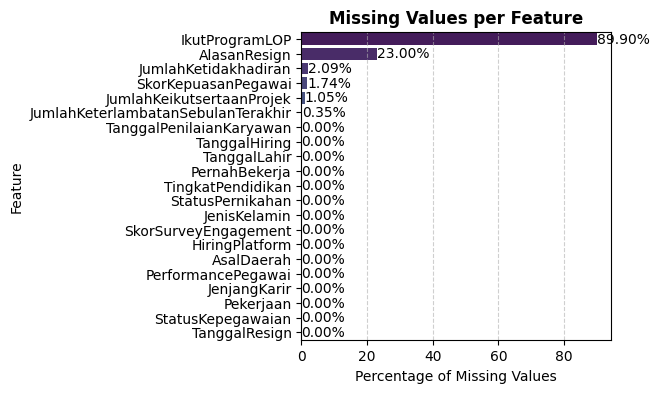

In [20]:

# Calculate the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(4, 4))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.title('Missing Values per Feature', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation) with mean or mode. Another option would be to drop columns with a high percentage of missing values.

In [21]:
# set the categorical columns
cat_var = df.select_dtypes(include=['object']).columns

# set the numerical columns
num_var = df.select_dtypes(include=np.number)

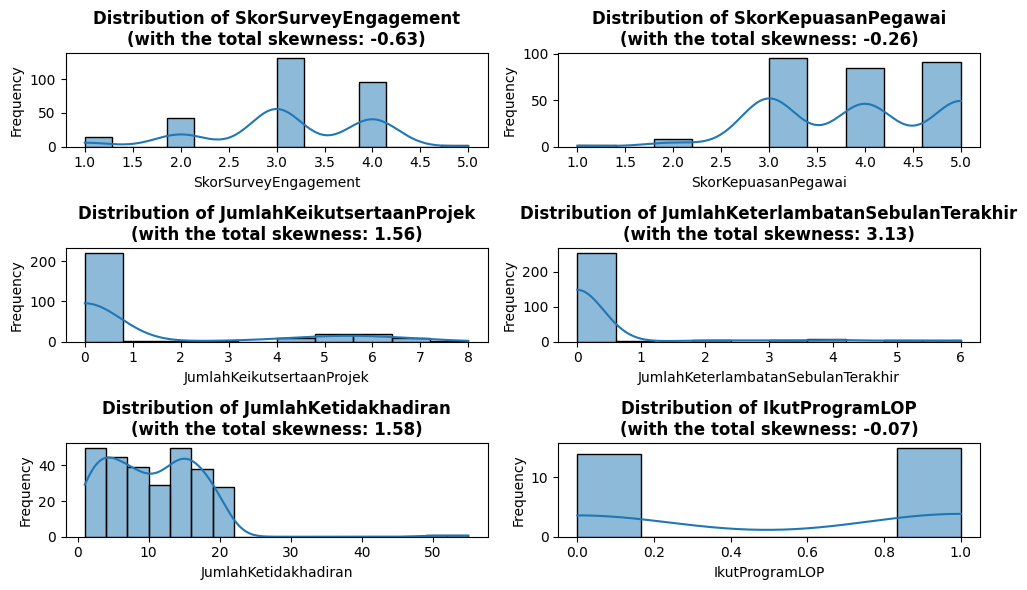

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(10,6))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(num_var):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name}\n(with the total skewness: {skewness:.2f})', fontweight='bold')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(num_var), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


since it's really small amount of data we might just fill the data with median because on how really skew the datas are. 

In [23]:
# List of columns to fill missing values with median
columns_to_fill_with_median = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

# Fill missing values with median for the specified columns
df[columns_to_fill_with_median] = df[columns_to_fill_with_median].fillna(df[columns_to_fill_with_median].median())

In [24]:
df.drop('IkutProgramLOP', axis=1, inplace=True)

## Handling outlier

In [25]:
# set the categorical columns
cat_var = df.select_dtypes(include=['object']).columns

# set the numerical columns
num_var = df.select_dtypes(include=np.number)

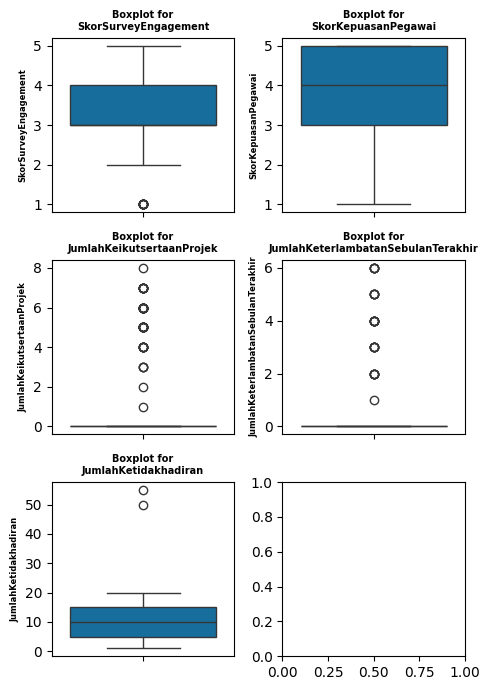

In [26]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 7))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(num_var):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for\n{column_name}', fontweight='bold', fontsize=7)
    axes[i].set_ylabel(column_name, fontweight='bold', fontsize=6)
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(num_var), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,287.0,3.905923,0.905423,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,287.0,10.439024,6.829769,1.0,5.0,10.0,15.0,55.0


Data distribution seems normal, we can conclude that **the dataset does not have outliers**.

## Handling inconsistent data

First, exclude datetime format to this visualization.

In [28]:
var_to_remove =['TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
cat_var_for_visualize = [x for x in cat_var if x not in var_to_remove]


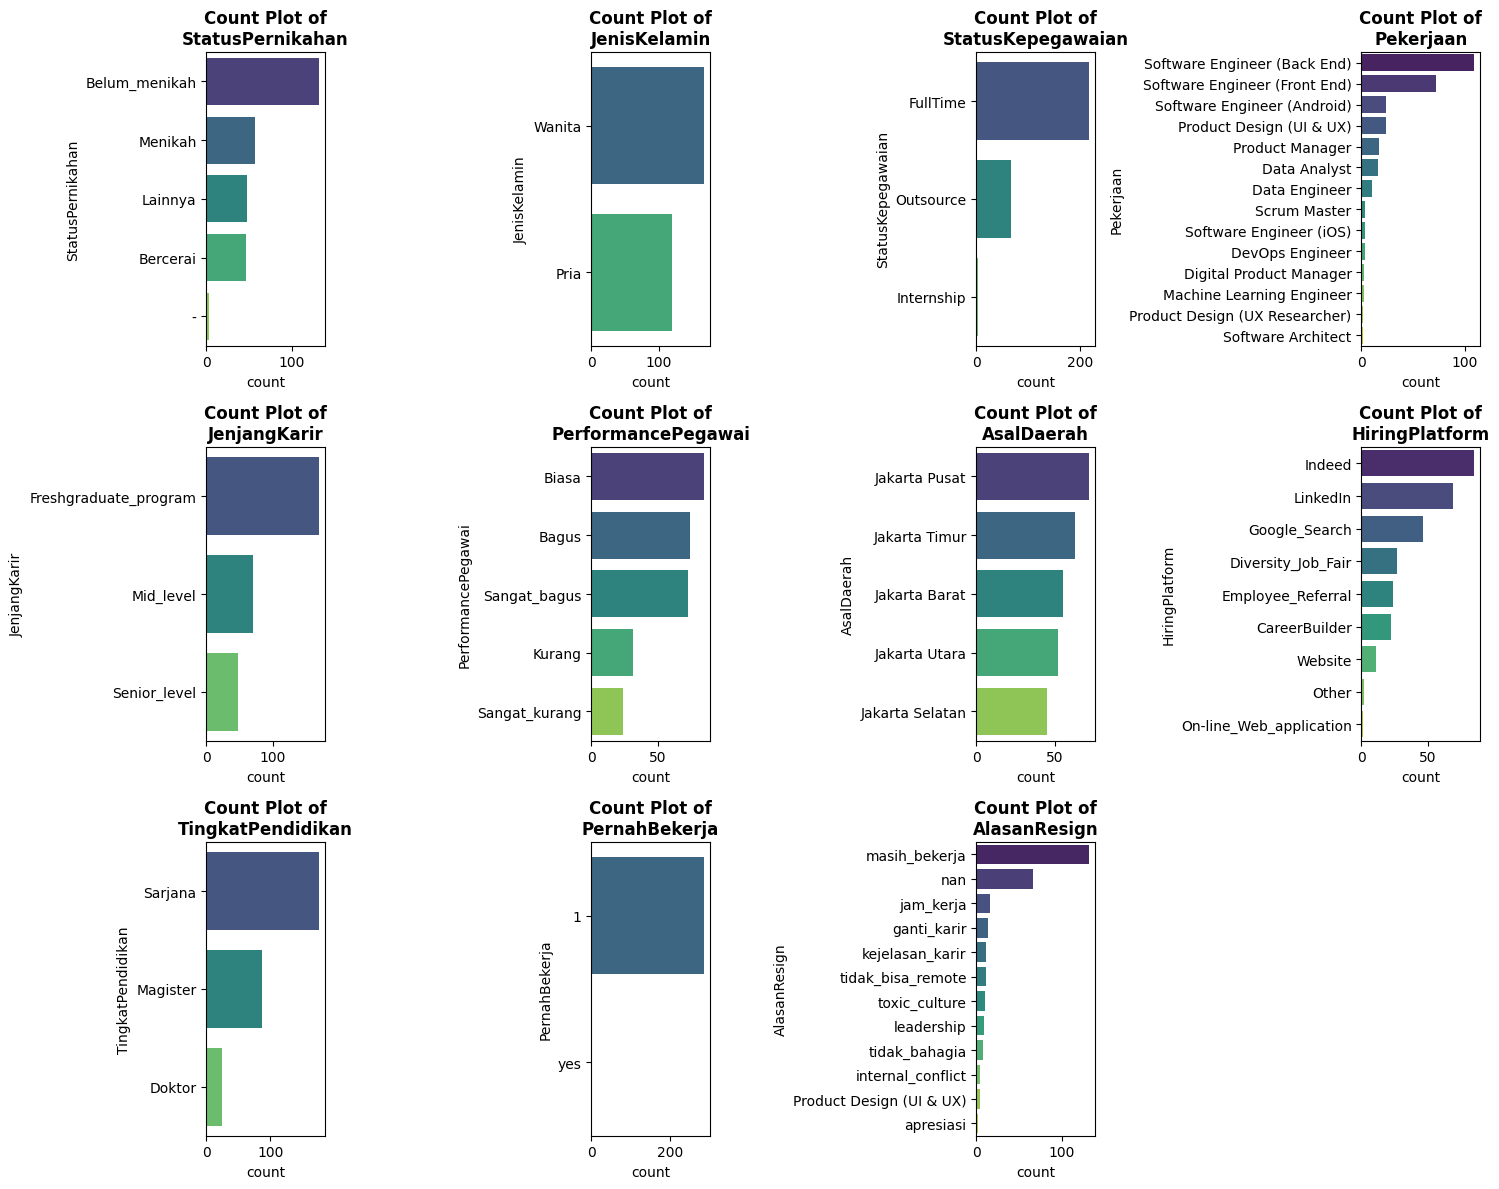

In [29]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Create a 3x4 grid of subplots for count plots
for i, column in enumerate(cat_var_for_visualize):
    plt.subplot(3, 4, i + 1)

    # Convert the column to a string type
    df[column] = df[column].astype(str)

    # Calculate the count of each category and sort them in ascending order
    category_counts = df[column].value_counts().sort_values(ascending=False)

    # Create the count plot
    sns.countplot(data=df, y=column, order=category_counts.index, palette='viridis')

    # Set labels and title
    plt.xlabel('count')
    plt.ylabel(column)
    plt.title(f'Count Plot of\n{column}', fontsize=12, fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

the diagram above show various columns with data that must be tidied up, such as:

* for `StatusPernikahan`:

I will move the merged '-' data values to 'other'

* Column `PernahBekerja`:

the step is I will combine everything from the value '1' to 'yes'

* column for `AlasanResign`:

step by step will be combine product design (UI & UX) into 'other'


then also create a new column for how many are still working and not.

In [30]:
# Handling inconsistent data 'StatusPernikahan'
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Bercerai', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Lainnya', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Belum_menikah', 'Tidak_menikah')

# Handling inconsistent data 'PernahBekerja'
df['PernahBekerja'] = df['PernahBekerja'].replace('1', 'yes')

# Mengatasi inconsistent data pada kolom 'AlasanResign'
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', 'Dll')
df['AlasanResign'] = df['AlasanResign'].replace('nan', 'Dll')

Here is chart after preprocessing.

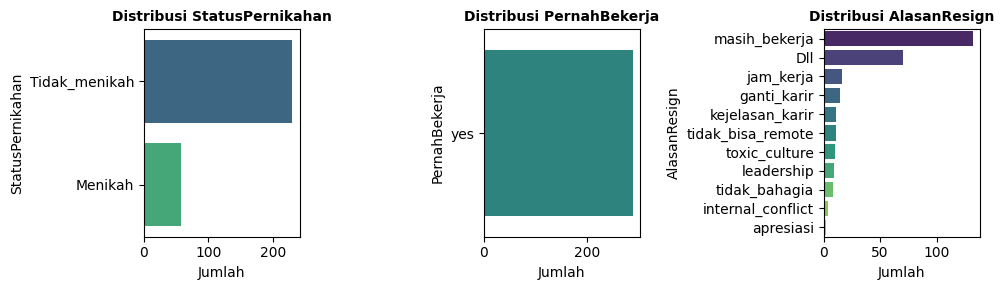

In [31]:

columns = ['StatusPernikahan', 'PernahBekerja', 'AlasanResign']

# Create subplots dynamically (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(10, 3))  # Increased width for better spacing

# Loop through the selected columns and create horizontal count plots
for i, column in enumerate(columns):
    # Sort categories by count in descending order
    order = df[column].value_counts().sort_values(ascending=False).index

    # Create horizontal count plot
    sns.countplot(data=df, y=column, order=order, palette='viridis', ax=ax[i])

    # Set labels and title
    ax[i].set_title(f'Distribusi {column}', fontsize=10, fontweight='bold')
    ax[i].set_xlabel('Jumlah')
    ax[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


# **Feature Engineering**

In Feature Engineering, I create the column StatusKerja to serve as our label by defining 'Tidak Bekerja' for rows with a non-null value in `TanggalResign` (indicating resignation) and 'Masih Bekerja' for rows with a null value in `TanggalResign` (indicating active employment). And the other things are adjusting datatype and some feature extraction.

## create: `StatusKerja` (target)

In [ ]:
print('number of null in "AlasanResign":', df['AlasanResign'].isnull().sum())
print('number of value "masih bekerja" in "AlasanResign":', ( df['AlasanResign']=='masih_bekerja').sum())
print('number of value "-" in "TanggalResign":', (df['TanggalResign'] == '-').sum())

number of null in "AlasanResign": 66
number of value "masih bekerja" in "AlasanResign": 132
number of value "-" in "TanggalResign": 198


After checking these columns that related to resignation, column 'TanggalResign' will be column that define the target.

In [ ]:
df[(df['TanggalResign'] == '-') &
    (df['AlasanResign'] != 'masih_bekerja') &
    (df['AlasanResign'].notnull())
    ][['TanggalResign', 'AlasanResign']]


,TanggalResign,AlasanResign


In [32]:
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if x == '-' or pd.isnull(x) else 'Tidak Bekerja')

## column: `Hiring`

In [33]:
# Convert "TanggalHiring" to datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

# Convert"TanggalResign" to datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Extract hiring dan resign time
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['BulanHiring'] = df['TanggalHiring'].dt.month
df['HariHiring'] = df['TanggalHiring'].dt.day

df['TahunResign'] = df['TanggalResign'].dt.year

## column: umur karyawan

In [34]:

df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
current_year = datetime.now().year
df['UsiaKaryawan'] = current_year - df['TanggalLahir'].dt.year

bins = [0, 30, 40, float('inf')]
labels = ['Muda', 'Menengah', 'Tua']
df['KategoriUsia'] = pd.cut(df['UsiaKaryawan'], bins=bins, labels=labels)

## column: durasi bekerja

In [35]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['LamaMenjabat'] = ((df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days // 30).fillna(0)

#**📈Annual Report Analysis📈**

this is the step where we have to create a daily report to our management to see if we can find any insight about our employee workflow and discuss it with HR or our personalia management.

# **Insight**

## 1. Company Employment Status

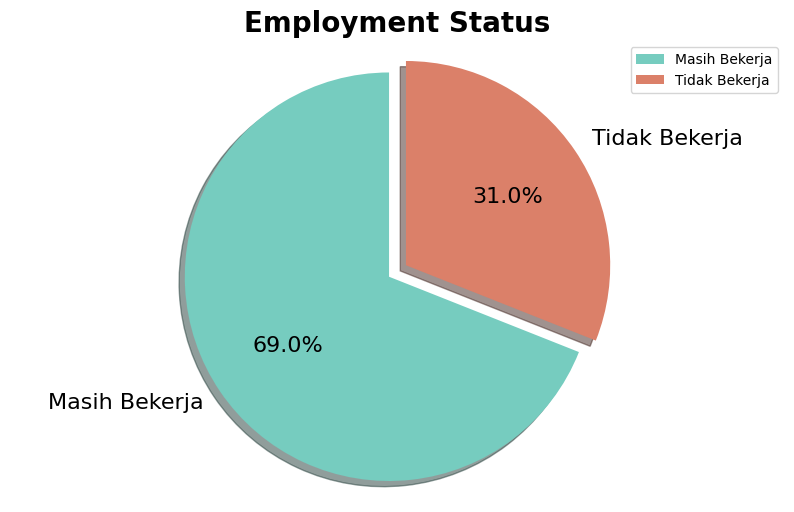

In [36]:
plt.figure(figsize=(10,6), facecolor='none')
my_labels = 'Masih Bekerja','Tidak Bekerja'
my_colors = ['#76ccbf','#db8069']
my_explode = (0, 0.1)
plt.pie(df.StatusKerja.value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=90, shadow = True, colors=my_colors, explode=my_explode, textprops={'fontsize': 16})
plt.title('Employment Status', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

Based on the dataset, this company still has 69% of its employees who were hired between 2006 and 2020.

## 2. Trends in Changes in the Number of Employees Each Year

In [37]:
# 1. Create two aggregate tables for incoming and outgoing employees
incoming_employees = df['TahunHiring'].value_counts().reset_index()
incoming_employees.columns = ['Year', 'Incoming Employees']

outgoing_employees = df['TahunResign'].value_counts().reset_index()
outgoing_employees.columns = ['Year', 'Outgoing Employees']

# 2. Join the two tables based on the year of resignation and hiring using an outer join
annual_report = incoming_employees.merge(outgoing_employees, on='Year', how='outer')

# 3. Perform imputation on the empty year data
annual_report['Year'] = annual_report['Year'].fillna(0)
annual_report['Year'] = annual_report['Year'].astype(int)

# 4. Calculate the total number of employees who resigned, those who still remain, and the changes in each year
annual_report['Total Resigned'] = annual_report['Outgoing Employees'].cumsum()
annual_report['Total Remaining'] = annual_report['Incoming Employees'].cumsum() - annual_report['Total Resigned']
annual_report['Changes'] = annual_report['Total Remaining'] - annual_report['Total Resigned']

In [38]:
annual_report = annual_report.sort_values(by='Year')

annual_report

,Year,Incoming Employees,Outgoing Employees,Total Resigned,Total Remaining,Changes
0,2006,1.0,NaN,NaN,NaN,NaN
1,2007,2.0,NaN,NaN,NaN,NaN
2,2008,2.0,NaN,NaN,NaN,NaN
3,2009,7.0,NaN,NaN,NaN,NaN
4,2010,8.0,NaN,NaN,NaN,NaN
5,2011,76.0,NaN,NaN,NaN,NaN
6,2012,41.0,NaN,NaN,NaN,NaN
7,2013,43.0,5.0,5.0,175.0,170.0
8,2014,56.0,12.0,17.0,219.0,202.0
9,2015,31.0,8.0,25.0,242.0,217.0


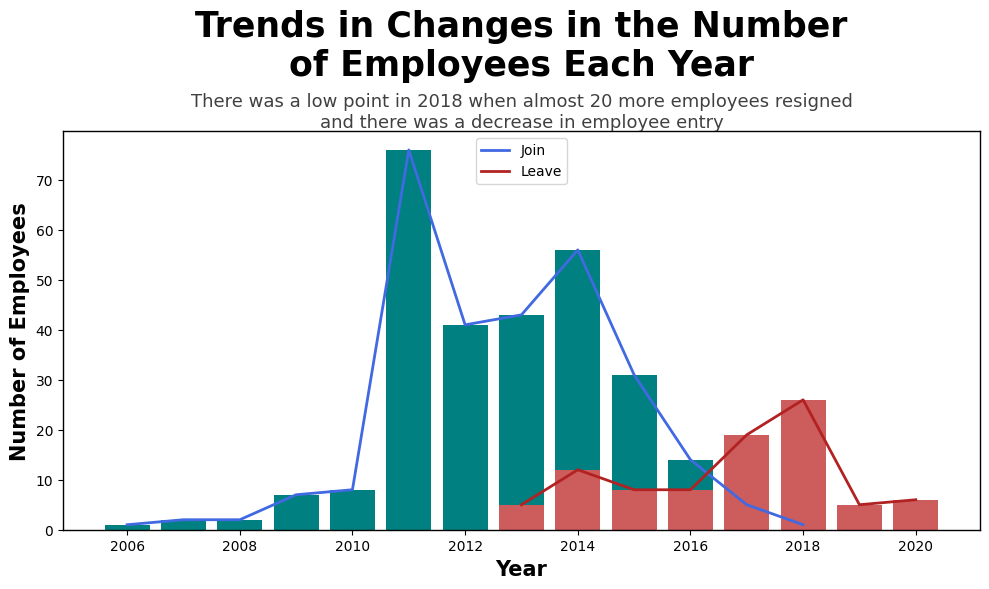

In [39]:

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line and bar plot for incoming employees
sns.lineplot(data=annual_report, x='Year', y='Incoming Employees', label='Join', lw=2, ax=ax, color='royalblue')
ax.bar(annual_report['Year'], annual_report['Incoming Employees'], color='teal')

# Line and Bar chart for outgoing employees
sns.lineplot(data=annual_report, x='Year', y='Outgoing Employees', color='firebrick', label='Leave', lw=2, ax=ax)
ax.bar(annual_report['Year'], annual_report['Outgoing Employees'], color='indianred')

# Add border around the chart (spines) with size 1.0
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.0)      # Set border thickness

# Set the title for the plot
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'There was a low point in 2018 when almost 20 more employees resigned\nand there was a decrease in employee entry'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=13, alpha=0.75)

# Set labels and title
ax.set_xlabel('Year', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=15, fontweight='bold')
ax.set_title('Trends in Changes in the Number\nof Employees Each Year', fontsize=25, fontweight='bold', pad=40)

# Add legend
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Key issues identified from the chart:**
* High Resignation Rate in 2018: More than 20 employees left the company, indicating dissatisfaction or external market factors.
* Declining Hiring Trend: The number of new employees joining the company has significantly reduced since 2014.
* Mismatch Between Hiring and Resignation Rates: In certain years, the number of employees leaving exceeds new hires, leading to potential workforce shortages.
* Need for Employee Retention Strategies: The trend suggests that the company must address factors contributing to high turnover.

In [40]:
df[(df['Pekerjaan'] == 'DevOps Engineer') & (df['StatusKerja'] == 'Masih Bekerja')]


,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,TahunHiring,BulanHiring,HariHiring,TahunResign,UsiaKaryawan,KategoriUsia,LamaMenjabat
110,Tidak_menikah,Wanita,FullTime,DevOps Engineer,Freshgraduate_program,Sangat_kurang,Jakarta Pusat,Employee_Referral,3,4.0,...,2020-02-25,NaT,Masih Bekerja,2015,1,5,NaN,37,Menengah,62
196,Tidak_menikah,Wanita,FullTime,DevOps Engineer,Mid_level,Kurang,Jakarta Barat,Indeed,3,3.0,...,2020-02-11,NaT,Masih Bekerja,2015,1,5,NaN,39,Menengah,62
250,Tidak_menikah,Pria,FullTime,DevOps Engineer,Freshgraduate_program,Bagus,Jakarta Barat,Employee_Referral,3,3.0,...,2020-01-14,NaT,Masih Bekerja,2015,1,5,NaN,55,Tua,61


## 3. Percentage of Existing Employee Each Job Division

In [41]:

# differentiate DataFrame based on status resign
existing_employees = df[df['StatusKerja'] == 'Masih Bekerja'].groupby('Pekerjaan').size().reset_index(name='Masih Bekerja')
resigned_employees = df[df['StatusKerja'] == 'Tidak Bekerja'].groupby('Pekerjaan').size().reset_index(name='Tidak Bekerja')

# join both DataFrame with outer join
employee_summary = pd.merge(existing_employees, resigned_employees, on='Pekerjaan', how='outer').fillna(0)

# create column total employee and percentage existing employee
employee_summary['TotalEmployee'] = employee_summary['Masih Bekerja'] + employee_summary['Tidak Bekerja']
employee_summary['RetentionRate'] = (employee_summary['Masih Bekerja'] / employee_summary['TotalEmployee']) * 100

employee_summary

,Pekerjaan,Masih Bekerja,Tidak Bekerja,TotalEmployee,RetentionRate
0,Data Analyst,8,8.0,16.0,50.000000
1,Data Engineer,7,3.0,10.0,70.000000
2,DevOps Engineer,3,0.0,3.0,100.000000
3,Digital Product Manager,2,0.0,2.0,100.000000
4,Machine Learning Engineer,2,0.0,2.0,100.000000
5,Product Design (UI & UX),15,9.0,24.0,62.500000
6,Product Design (UX Researcher),1,0.0,1.0,100.000000
7,Product Manager,11,6.0,17.0,64.705882
8,Scrum Master,3,0.0,3.0,100.000000
9,Software Architect,1,0.0,1.0,100.000000


The data suggests that technical and managerial roles tend to have higher stability, while creative and analytical roles show more movement.


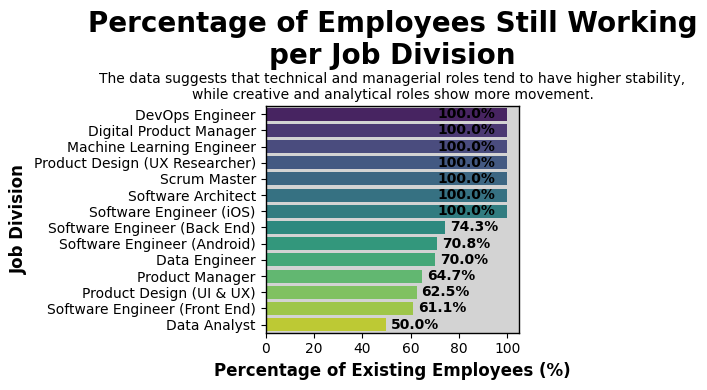

In [43]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create bar plot
ax = sns.barplot(
    y='Pekerjaan', 
    x='RetentionRate', 
    data=employee_summary, 
    palette='viridis', 
    order=employee_summary.sort_values('RetentionRate', ascending=False)['Pekerjaan']
)
ax.set_facecolor('lightgrey')

# Add labels on each bar, adjusting position for high values
for container in ax.containers:
    for bar in container:
        width = bar.get_width()  # Get the bar length
        label_x_pos = width + 2 if width < 98 else width - 5  # Adjust position
        ax.text(
            label_x_pos,  # X position
            bar.get_y() + bar.get_height() / 2,  # Y position (middle of the bar)
            f'{width:.1f}%',  # Label text
            ha='left' if width < 98 else 'right',  # Align left for lower values, right for higher
            va='center',
            fontsize=10,
            fontweight='bold',
            color='black'
        )

# Add border around the chart (spines) with size 1.0
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set chart border color
    spine.set_linewidth(1.0)      # Set chart border thickness

# Set labels and title
plt.xlabel("Percentage of Existing Employees (%)", fontsize=12, fontweight='bold')
plt.ylabel("Job Division", fontsize=12, fontweight='bold')
plt.title("Percentage of Employees Still Working\nper Job Division", fontsize=20, fontweight='bold', pad=30)

# Add small text description below the title (aligned properly)
ax.text(
    0.5, 1.15,  # X, Y position in axis coordinates
    "The data suggests that technical and managerial roles tend to have higher stability,\nwhile creative and analytical roles show more movement.",
    fontsize=10,
    ha='center',
    va='top',
    transform=ax.transAxes
)

# Adjust layout
plt.tight_layout()
plt.show()


## 4. Reason for Resigning of Job Division with Highest Resignation Rate

In [44]:
# Identifying division with highest resignation rate 
highest_resign_division = employee_summary.sort_values('Tidak Bekerja', ascending=False).iloc[0]['Pekerjaan']

# Aggregate data based on 'Jenjang Karir', 'Performance Pegawai', and 'Alasan Resign'
resign_analysis = df[df['Pekerjaan'] == highest_resign_division] \
    .groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']) \
    .size().reset_index(name='TotalResigned')

# Remove 'masih_bekerja' from the dataset
resign_analysis = resign_analysis[resign_analysis['AlasanResign'] != 'Masih Bekerja']

print(f"The division with the highest resignation rate is: {highest_resign_division}") 


The division with the highest resignation rate is: Software Engineer (Back End)


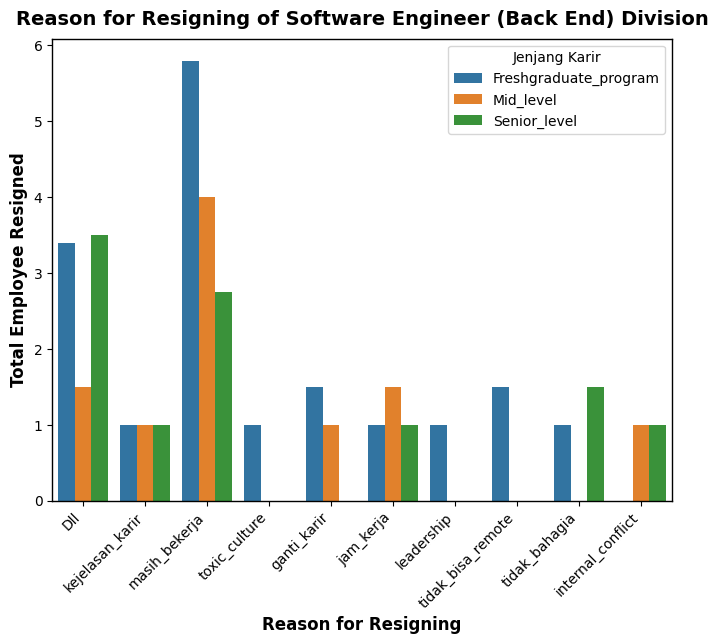

In [48]:

# Visualization
plt.figure(figsize=(8,6))

# Create bar plot without error bars and exclude 'masih_bekerja'
ax = sns.barplot(
    x='AlasanResign', 
    y='TotalResigned', 
    data=resign_analysis, 
    hue='JenjangKarir', 
    dodge=True,
    errorbar=None  # Remove error bars
)

# Add border around the chart (spines) with size 1.0
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set chart border color
    spine.set_linewidth(1.0)      # Set chart border thickness

# Set labels and title
plt.xlabel("Reason for Resigning", fontsize=12, fontweight='bold')
plt.ylabel("Total Employee Resigned", fontsize=12, fontweight='bold')
plt.title(f"Reason for Resigning of {highest_resign_division} Division", fontsize=14, fontweight='bold', pad=10)
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend(title='Jenjang Karir')

# Show the plot
plt.show()


## 5. Incoming and Outgoing Employees Based on Career Level

In [50]:
df_resigned = df[df['StatusKerja'] == 'Tidak Bekerja']

# Create an aggregation table to calculate the number of employees who resigned based on career level, employee performance and reasons for resigning
tabel_agregasi = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahKaryawanResign')
    

In [51]:

# Step 1: Count total employees per career level
total_employees = df.groupby('JenjangKarir').size().rename('TotalEmployees')

# Step 2: Count resigned employees per career level
resigned_employees = df[df['StatusKerja'] == 'Tidak Bekerja'].groupby('JenjangKarir').size().rename('ResignedEmployees')

# Step 3: Merge both DataFrames
resignation_rate_df = pd.concat([total_employees, resigned_employees], axis=1).fillna(0)

# Step 4: Calculate resignation rate
resignation_rate_df['ResignationRate'] = (resignation_rate_df['ResignedEmployees'] / resignation_rate_df['TotalEmployees']) * 100

# Display the final DataFrame
print(resignation_rate_df)



                       TotalEmployees  ResignedEmployees  ResignationRate
JenjangKarir                                                             
Freshgraduate_program             169                 50        29.585799
Mid_level                          70                 23        32.857143
Senior_level                       48                 16        33.333333


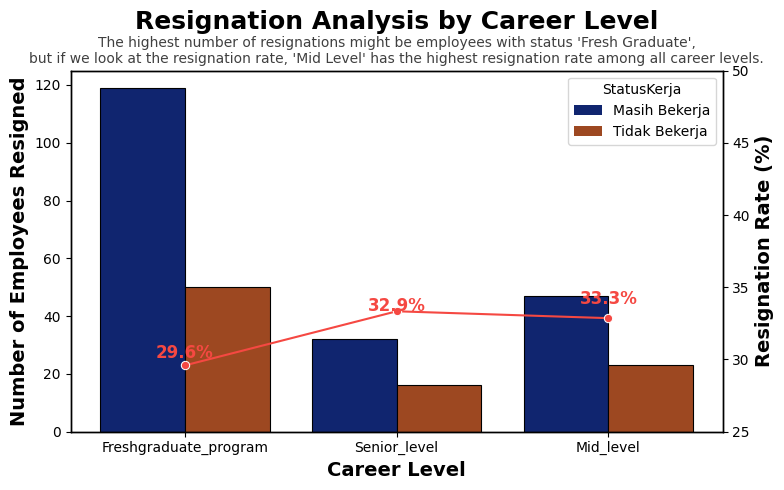

In [105]:

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- First Y-Axis: Bar Chart (Number of Employees Resigned) ---
sns.countplot(data=df, x='JenjangKarir', hue='StatusKerja', palette='dark', ax=ax1)

# Labels for bar chart
ax1.set_xlabel('Career Level', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Employees Resigned', fontsize=14, fontweight='bold', color='black')
ax1.set_title('Resignation Analysis by Career Level', fontsize=18, fontweight='bold', pad=30)

# Add description text below the title
desc_text = ("The highest number of resignations might be employees with status 'Fresh Graduate',\nbut if we look at the resignation rate, 'Mid Level' has the highest resignation rate among all career levels.")

plt.text(0.5, 1.02, desc_text, fontsize=10, alpha=0.75, ha='center', transform=ax1.transAxes)

# Set bar edge color
for bar in ax1.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)

# Remove grid
ax1.grid(False)

# --- Second Y-Axis: Line Chart (Resignation Rate in %) ---
ax2 = ax1.twinx()  # Create secondary y-axis
sns.lineplot(
    data=resignation_rate_df.reset_index(), 
    x='JenjangKarir', 
    y='ResignationRate', 
    color='#f54842', 
    marker='o', 
    linewidth=1.5, 
    ax=ax2
)

# Set right y-axis range from 0% to 100%
ax2.set_ylim(25, 50)

# Labels for resignation rate
ax2.set_ylabel('Resignation Rate (%)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y')

# Remove grid from second axis
ax2.grid(False)

# Add percentage labels on top of line points
for i, txt in enumerate(resignation_rate_df['ResignationRate']):
    ax2.annotate(f'{txt:.1f}%', 
                 (i, txt), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center', fontsize=12, fontweight='bold', color='#f54842')

# --- Add Border Around the Chart ---
for spine in ax1.spines.values():  # Apply to first y-axis
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

for spine in ax2.spines.values():  # Apply to second y-axis
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Improve layout
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 6. Outgoing Employees based on Performance

In [ ]:
# Define the correct order of categories
performance_order = ['Sangat_bagus', 'Bagus', 'Biasa', 'Kurang', 'Sangat_kurang']

# Count total employees per performance category
total_performance = df.groupby('PerformancePegawai')['StatusKerja'].count()
resigned_performance = df[df['StatusKerja'] == 'Tidak Bekerja'].groupby('PerformancePegawai')['StatusKerja'].count()

# Calculate percentage of resigned employees
percentage_resigned = (resigned_performance / total_performance * 100).reindex(performance_order).reset_index()
percentage_resigned.columns = ['PerformancePegawai', 'PercentageResigned']

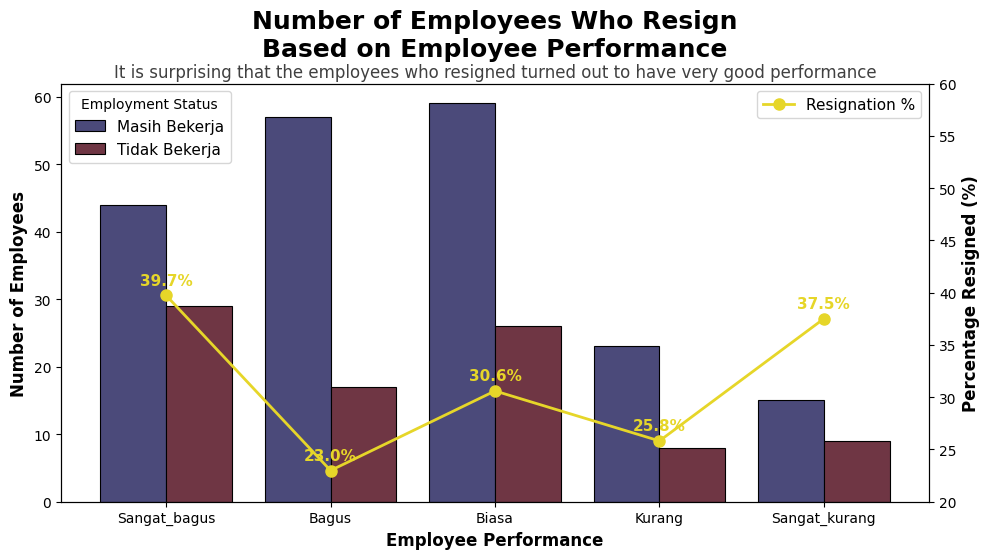

In [ ]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart on primary y-axis
sns.countplot(
    data=df, 
    x='PerformancePegawai', 
    hue='StatusKerja', 
    palette='icefire', 
    order=performance_order, 
    ax=ax1
)

# Add borders to bars
for bar in ax1.patches:
    bar.set_edgecolor('black')  
    bar.set_linewidth(0.8)      

# Primary y-axis labels
ax1.set_xlabel('Employee Performance', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
ax1.set_title('Number of Employees Who Resign\nBased on Employee Performance', 
              fontsize=18, fontweight='bold', pad=20)  # Adjusted title padding

# Secondary y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(percentage_resigned['PerformancePegawai'], percentage_resigned['PercentageResigned'], 
         color='#e6d629', marker='o', markersize=8, linestyle='-', linewidth=2, label='Resignation %')

# Add labels to line chart points
for i, txt in enumerate(percentage_resigned['PercentageResigned']):
    ax2.text(i, txt + 1, f'{txt:.1f}%', color='#e6d629', fontsize=11, ha='center', fontweight='bold')
ax2.set_ylim(20, 60)
# Secondary y-axis labels
ax2.set_ylabel('Percentage Resigned (%)', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y')

# Adjust text annotation placement
desc = 'It is surprising that the employees who resigned turned out to have very good performance'
plt.text(0.5, 1.05, desc, ha='center', va='top', fontsize=12, alpha=0.75, transform=ax1.transAxes)

# Adjust legend placement
ax1.legend(title='Employment Status', loc='upper left', fontsize=11)
ax2.legend(loc='upper right', fontsize=11)

# Adjust layout and display plot
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Prevents title from being cut off
plt.show()



## 7. Resign Reason Analysis for Employee Attrition Management Strategy

In [110]:
# Menghitung jumlah karyawan yang resign berdasarkan Alasan Resign
alasan_resign_counts = df_resigned['AlasanResign'].value_counts()

# Mengurutkan kategori Alasan Resign berdasarkan jumlah karyawan yang resign dari yang terbesar
alasan_resign_sorted = alasan_resign_counts.sort_values(ascending=False)

# Calculate percentage
alasan_resign_percentage = (alasan_resign_counts / alasan_resign_counts.sum()) * 100

# Combine into a DataFrame
alasan_resign_df = pd.DataFrame({
    'AlasanResign': alasan_resign_counts.index,
    'Count': alasan_resign_counts.values,
    'Percentage': alasan_resign_percentage.values
})

# Display the table
alasan_resign_df

,AlasanResign,Count,Percentage
0,jam_kerja,16,17.977528
1,ganti_karir,14,15.730337
2,kejelasan_karir,11,12.359551
3,tidak_bisa_remote,11,12.359551
4,toxic_culture,10,11.235955
5,leadership,9,10.112360
6,tidak_bahagia,8,8.988764
7,internal_conflict,4,4.494382
8,Dll,4,4.494382
9,apresiasi,2,2.247191


In [52]:
# Count and sort resignation reasons
alasan_resign_counts = df_resigned['AlasanResign'].value_counts()
alasan_resign_sorted = alasan_resign_counts.sort_values(ascending=False)

# Calculate percentage
alasan_resign_percentage = (alasan_resign_counts / alasan_resign_counts.sum()) * 100

# Create DataFrame
alasan_resign_df = pd.DataFrame({
    'AlasanResign': alasan_resign_counts.index,
    'Count': alasan_resign_counts.values,
    'Percentage': alasan_resign_percentage.values
})


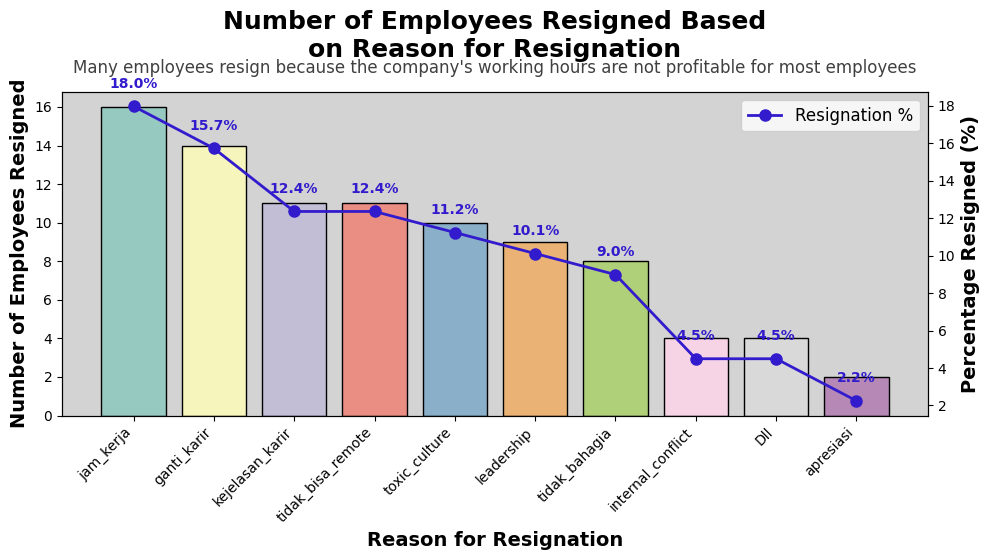

In [113]:

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart (primary y-axis)
sns.barplot(
    x='AlasanResign', 
    y='Count', 
    data=alasan_resign_df, 
    order=alasan_resign_sorted.index, 
    palette='Set3', 
    ax=ax1
)

# Customizing bar appearance
ax1.set_facecolor('lightgrey')
for bar in ax1.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

# Secondary axis for percentage line chart
ax2 = ax1.twinx()
ax2.plot(
    alasan_resign_df['AlasanResign'], 
    alasan_resign_df['Percentage'], 
    color= '#321bcc', marker='o', markersize=8, linestyle='-', linewidth=2, label='Resignation %'
)
# Add labels on the line chart
for i, txt in enumerate(alasan_resign_df['Percentage']):
    ax2.text(i, txt + 1, f'{txt:.1f}%', color='#321bcc', fontsize=10, ha='center', fontweight='bold')

# Set labels and titles
ax1.set_xlabel('Reason for Resignation', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Employees Resigned', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentage Resigned (%)', fontsize=14, fontweight='bold')

ax1.set_title('Number of Employees Resigned Based\non Reason for Resignation', 
              fontsize=18, fontweight='bold', pad=25)

# Improve x-axis readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add a description above the plot
desc = "Many employees resign because the company's working hours are not profitable for most employees"
plt.text(0.5, 1.1, desc, ha='center', va='top', fontsize=12, alpha=0.75, transform=ax1.transAxes)

# Adjust legend
ax2.legend(loc='upper right', fontsize=12)

# Optimize layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()


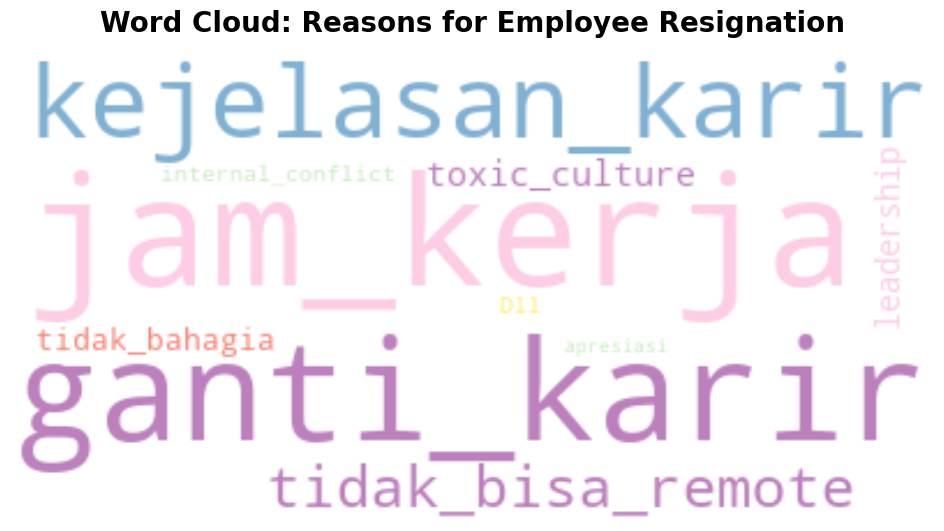

In [ ]:

# Calculate the number of employees who resign based on the Reason for Resignation
alasan_resign_counts = df_resigned['AlasanResign'].value_counts()

# Convert data to a format suitable for WordCloud (dictionary)
word_freq = dict(alasan_resign_counts)

# Create the Word Cloud
wordcloud = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='Set3',
    max_words=50
).generate_from_frequencies(word_freq)

# Showing Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud: Reasons for Employee Resignation', fontsize=20, fontweight='bold', pad=20)
plt.show()


# **Exploratory Data Analysis**

In [ ]:
# redefine the data type
cat_var = df.select_dtypes(include=['object']).columns
var_to_remove =['TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
cat_var_for_visualize = [x for x in cat_var if x not in var_to_remove]
# set the numerical columns
num_var = df.select_dtypes(include=np.number)

## Multivariate Analysis

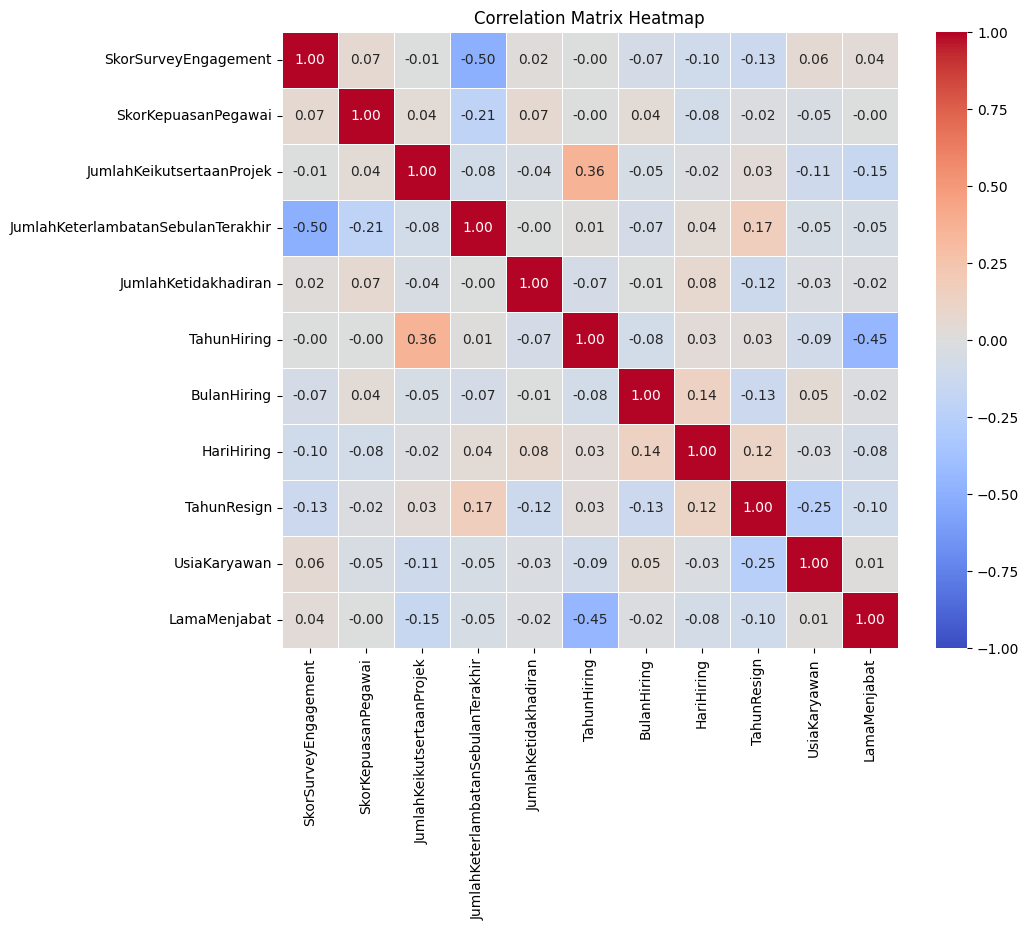

In [171]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            linewidths=0.5, square=True, vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see that there are no pairs of features with a high correlation, so I decided not to drop any features.

## Univariate Analysis

### Categorical

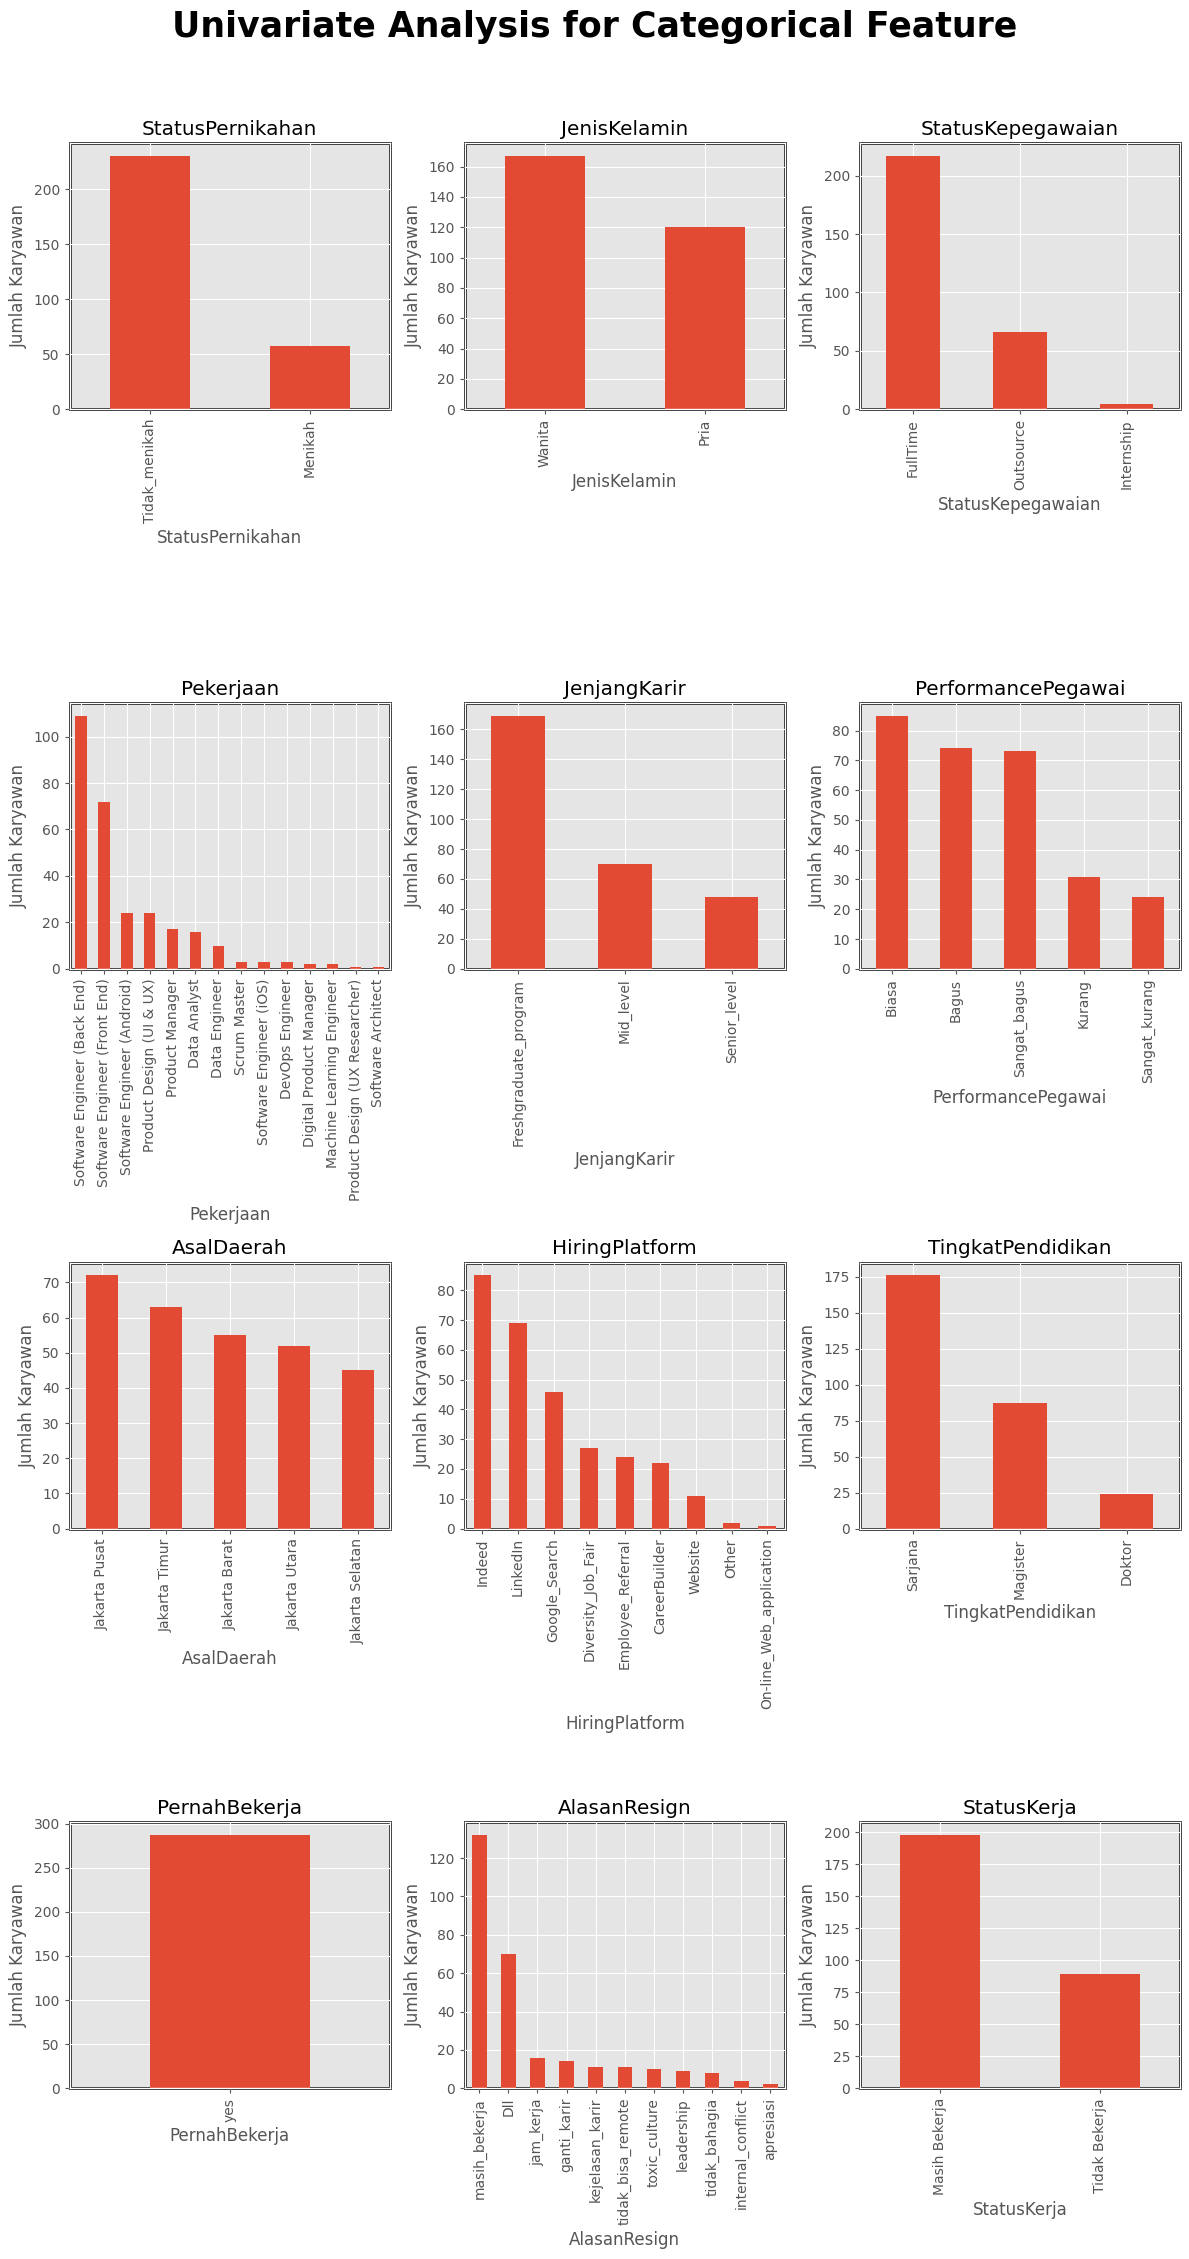

In [173]:

# Set style for plots
plt.style.use('ggplot')

# Number of rows and columns for the subplot grid
n_rows, n_cols = 4, 3

# Create the figure and subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 23))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Title for the entire figure
fig.suptitle('Univariate Analysis for Categorical Feature', fontsize=25, fontweight='bold')

# Iterate through each categorical variable and plot
for i, column in enumerate(cat_var_for_visualize):
    ax = axes[i]  # Select the appropriate subplot axis

    # Plot value counts as a bar plot for the current column
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Jumlah Karyawan', fontsize=12)
    ax.set_title(column)
    ax.patch.set_edgecolor('black')  # Set border color
    ax.patch.set_linewidth(2) 
    


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with title
plt.show()


### Numerical

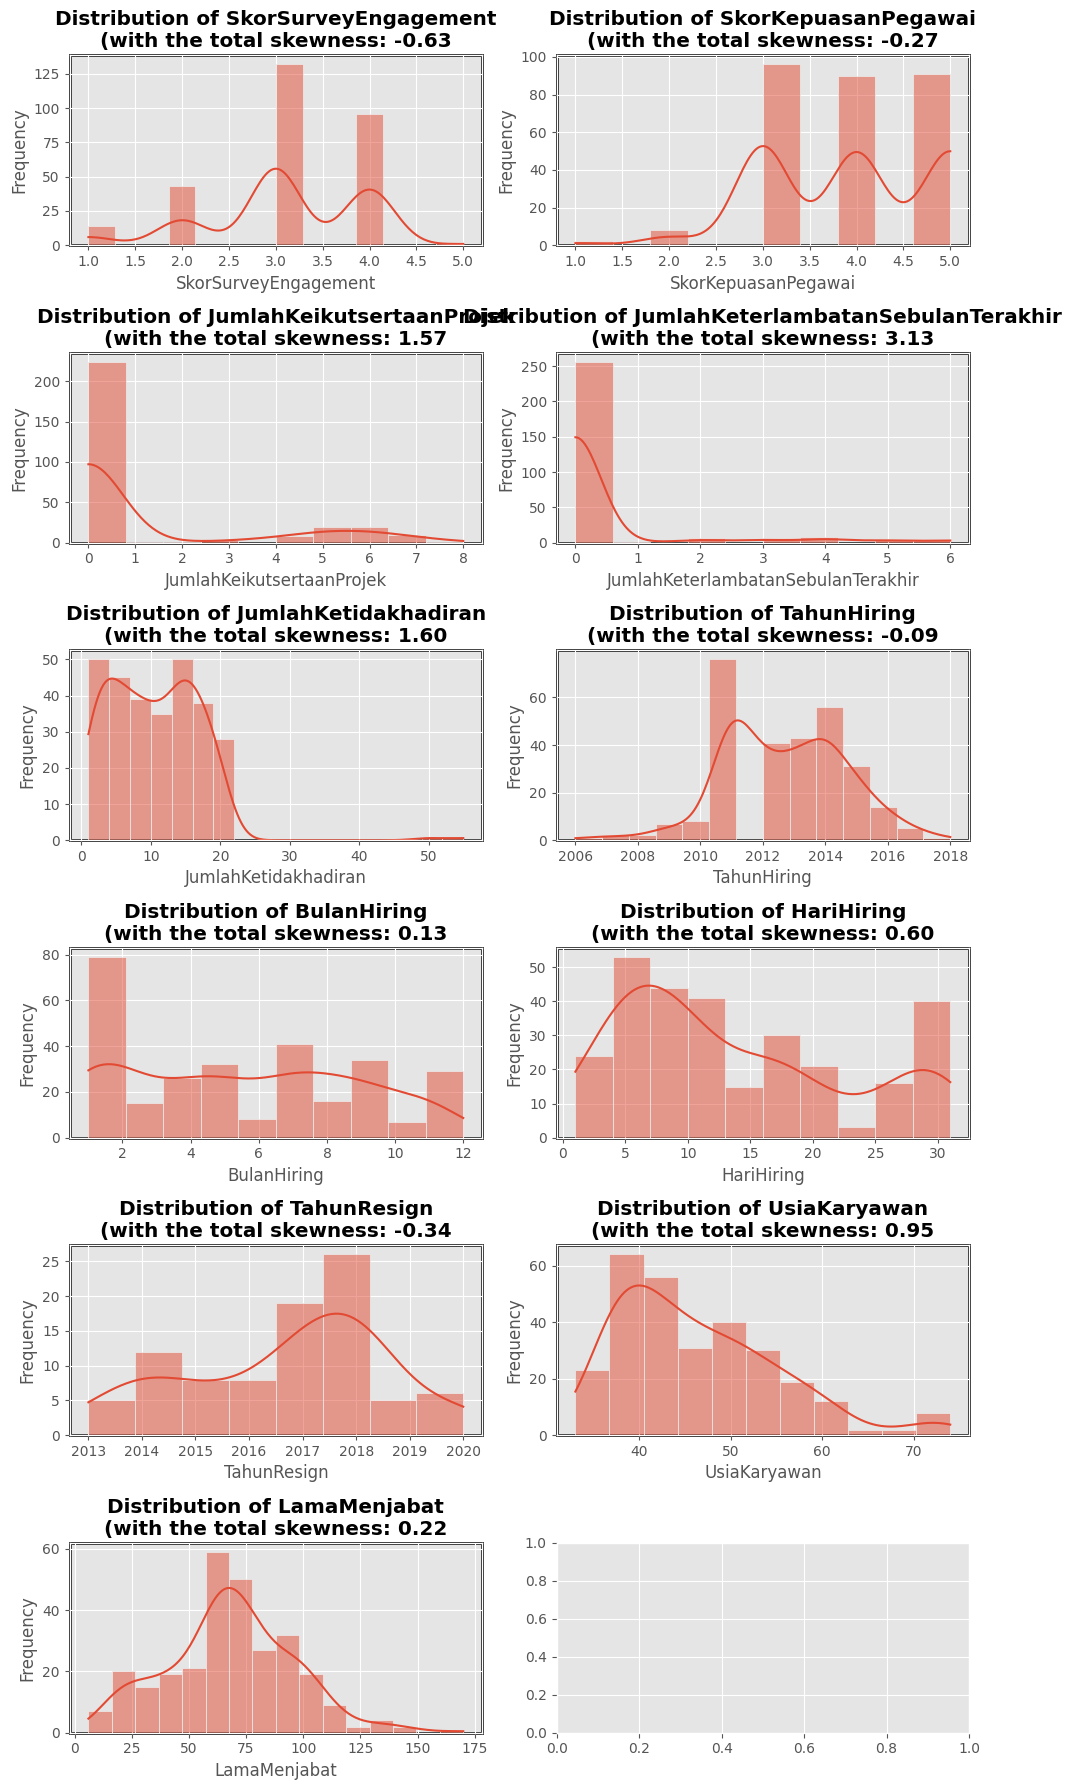

In [174]:
fig, ax = plt.subplots(6, 2, figsize=(10, 18))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(num_var):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name}\n(with the total skewness: {skewness:.2f}', fontweight='bold')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')
    ax[i].patch.set_edgecolor('black')  # Set border color
    ax[i].patch.set_linewidth(2) 

# Hide any empty subplots
for i in range(len(num_var), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Bivariate Analysis (categorical feature)

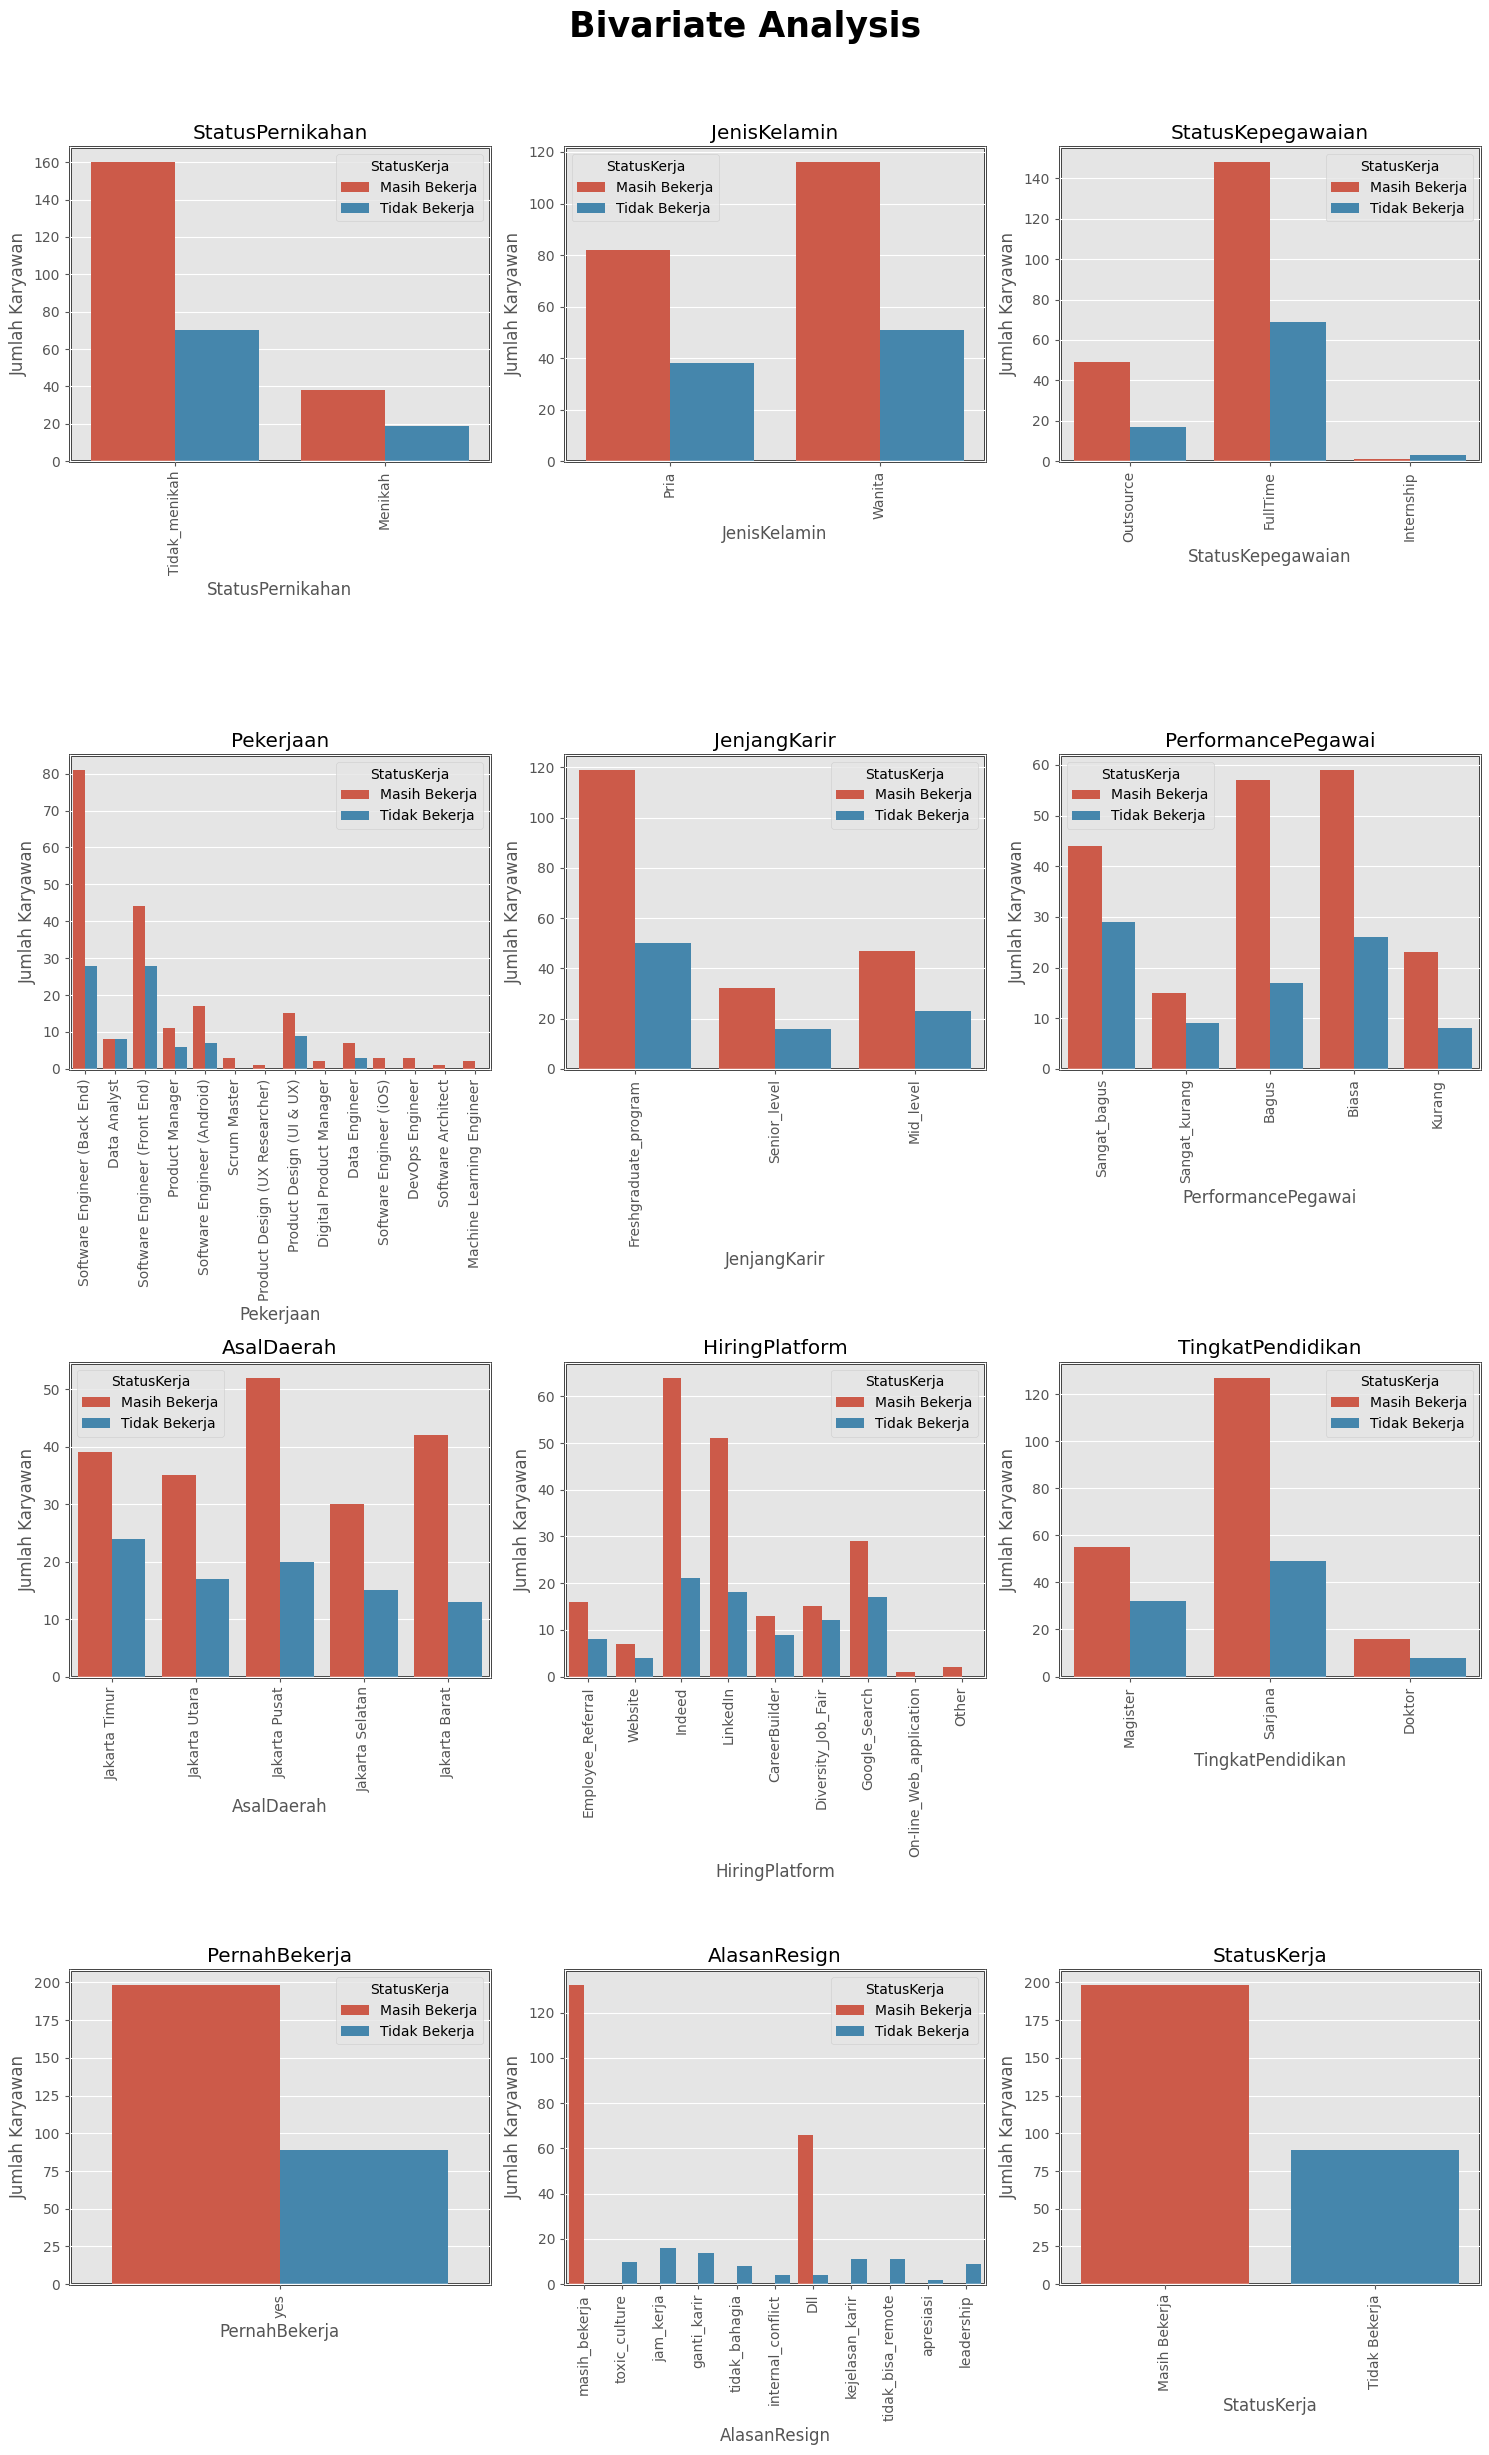

In [175]:
# Set style for plots
plt.style.use('ggplot')

# Number of rows and columns for the subplot grid
n_rows, n_cols = 4, 3

# Create the figure and subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Title for the entire figure
fig.suptitle('Bivariate Analysis', fontsize=25, fontweight='bold')

# Iterate through each categorical variable and plot
for i, column in enumerate(cat_var_for_visualize):
    ax = axes[i]  # Select the appropriate subplot axis

    # Create the countplot for the current column
    sns.countplot(x=df[column], hue=df['StatusKerja'], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

    # Change y-axis label to 'Jumlah Karyawan' for each subplot
    ax.set_ylabel('Jumlah Karyawan', fontsize=12)

    ax.patch.set_edgecolor('black')  # Set border color
    ax.patch.set_linewidth(2) 

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Data Preparation**

In [176]:
missing_rows = df.isnull().sum(axis=1)
missing_columns = df.isnull().sum(axis=0)
missing_columns

StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
TingkatPendidikan                       0
PernahBekerja                           0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
StatusKerja                             0
TahunHiring                             0
BulanHiring                             0
HariHiring                        

## Label Encoding

Here I will undergo one hot encoding for features that have small number of unique value, and label encoding for that have several unique value.

In [177]:
df_encoded = df.copy()

In [ ]:
# Features for one-hot encoding
one_hot_columns = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'KategoriUsia']

# Features for label encoding
label_encode_columns = ['Pekerjaan', 'PernahBekerja', 'AlasanResign', 'StatusKerja', 'PerformancePegawai', 'StatusKerja']

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns)

# Label encoding

label_encoder = LabelEncoder()
for column in label_encode_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

We can remove unnecessary features that also still have large number of missing values.

In [179]:
# removing unecesssary columns
columns_to_drop = [ 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunResign']
df_encoded.drop(columns_to_drop, axis=1, inplace=True)

In [180]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Pekerjaan                               287 non-null    int64  
 1   PerformancePegawai                      287 non-null    int64  
 2   SkorSurveyEngagement                    287 non-null    int64  
 3   SkorKepuasanPegawai                     287 non-null    float64
 4   JumlahKeikutsertaanProjek               287 non-null    float64
 5   JumlahKeterlambatanSebulanTerakhir      287 non-null    float64
 6   JumlahKetidakhadiran                    287 non-null    float64
 7   PernahBekerja                           287 non-null    int64  
 8   AlasanResign                            287 non-null    int64  
 9   StatusKerja                             287 non-null    int64  
 10  TahunHiring                             287 non-null    int32 

We no longer have missing value in our dataset. We can continue to the next data preparation step: Data Scaling. TSata scaling is important because we have to ensures that all features are on a similar scale.

## Data Scaling

In [181]:

# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi Min-Max pada fitur-fitur numerik
numeric_features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

## Feature selection

Since we are working with categorical features and a classification problem, SelectKBest with chi2 is a great choice because it is: fast, helps remove irrelevant features, works well with encoded categorical data.

In [ ]:
# Create an instance of SelectKBest with k=15 and chi-squared scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)

X = df_encoded.drop(['StatusKerja'], axis=1)
y = df_encoded['StatusKerja']

# Fit the selector to your data and transform your features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['PerformancePegawai', 'AlasanResign', 'HariHiring', 'UsiaKaryawan',
       'LamaMenjabat', 'StatusKepegawaian_Internship',
       'AsalDaerah_Jakarta Barat', 'AsalDaerah_Jakarta Timur',
       'HiringPlatform_CareerBuilder', 'HiringPlatform_Diversity_Job_Fair',
       'HiringPlatform_Indeed', 'HiringPlatform_Other',
       'TingkatPendidikan_Magister', 'KategoriUsia_Menengah',
       'KategoriUsia_Tua'],
      dtype='object')


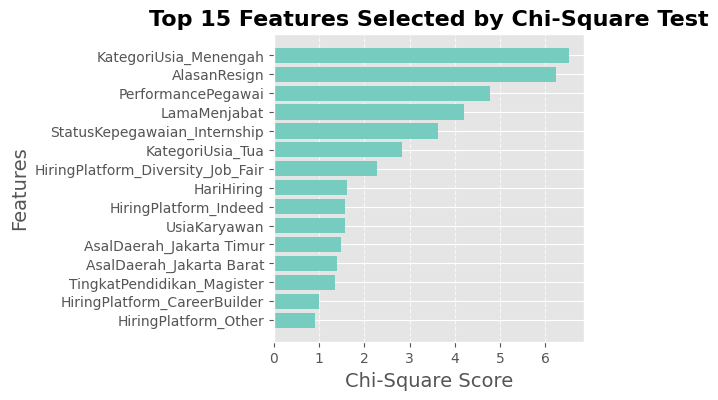

In [183]:

# Get feature scores
feature_scores = selector.scores_[selected_feature_indices]

# Sort features by score (optional)
sorted_indices = np.argsort(feature_scores)[::-1]  # Sort in descending order
sorted_features = selected_feature_names[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

# Plot the feature scores
plt.figure(figsize=(4,4), facecolor='none')  # Transparent background
plt.barh(sorted_features, sorted_scores, color='#76ccbf')
plt.xlabel("Chi-Square Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title(f"Top {k} Features Selected by Chi-Square Test", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Data Splitting

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split details
print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 287
Training Samples: 229 (79.79%)
Testing Samples: 58 (20.21%)


# **Machine Learning**

In [ ]:
# Perform feature selection on the training data
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Initialize a list to store the results
results = []

# Train and evaluate all models with feature selection
for model_name, model in models:
    # Train the model with selected features
    model.fit(X_train_selected, y_train)

    # Train predictions (for train score)
    y_train_pred = model.predict(X_train_selected)

    # Test predictions
    y_test_pred = model.predict(X_test_selected)

    # Calculate train scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate test scores
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)

    # Append the results to the list
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.694323,0.672414,0.000000,0.000000,0.000000,0.500000
1,Gradient Boosting,1.000000,0.948276,0.900000,0.947368,0.923077,0.948043
2,Decision Tree,1.000000,0.931034,0.857143,0.947368,0.900000,0.935223
3,Random Forest,1.000000,0.896552,0.933333,0.736842,0.823529,0.855601
4,Logistic Regression,0.698690,0.689655,0.600000,0.157895,0.250000,0.553306


In [186]:
# Create the Gradient Boosting model
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f'confusion matrix: \n {conf_matrix}')
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Value": [accuracy, precision, recall, f1, roc_auc]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

confusion matrix: 
 [[38  1]
 [ 1 18]]


,Metric,Value
0,Accuracy,0.965517
1,Precision,0.947368
2,Recall,0.947368
3,F1 Score,0.947368
4,ROC-AUC,0.989204


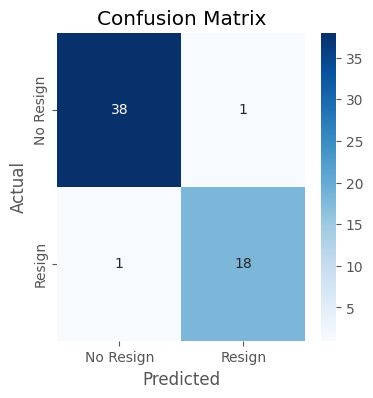

In [187]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Resign', 'Resign'], yticklabels=['No Resign', 'Resign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From all of the model that already run, it seems like the Gradient boosting🚀, have an excellent Precision, Recall, and one of the most important is ROC.

It can be conclude Gradient Boosting is a perfect model for this project. Next step is cross validation and create a hyperparameter to actually boosting the performance.

## Cross Validation

In [ ]:

# Create  Gradient Boosting model
model = GradientBoostingClassifier()

# Specify the evaluation metrics to use
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

# Calculate the mean and standard deviation of precision, recall, and ROC-AUC scores
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
roc_auc_mean = cv_results['test_roc_auc'].mean()
roc_auc_std = cv_results['test_roc_auc'].std()

# Example metrics
metrics_summary = {
    "Metric": ["Precision", "Recall", "ROC-AUC"],
    "Mean": [precision_mean, recall_mean, roc_auc_mean],
    "Standard Deviation": [precision_std, recall_std, roc_auc_std]
}

# Convert the dictionary into a DataFrame
summary_df = pd.DataFrame(metrics_summary)

summary_df


,Metric,Mean,Standard Deviation
0,Precision,0.975000,0.050000
1,Recall,0.957143,0.065465
2,ROC-AUC,0.972321,0.030981


These results suggest that the model demonstrates strong precision and recall scores, indicating its ability to correctly classify positive cases while minimizing false positives and false negatives. Additionally, the high ROC-AUC score reflects the model's excellent overall discrimination ability.

## Hyperparameter Tuning

In [ ]:

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the model
gb = GradientBoostingClassifier()

# Perform Grid Search
grid_search = GridSearchCV(gb, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


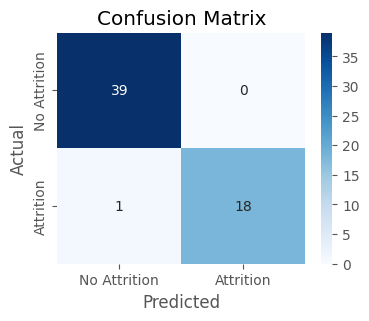

      Metric     Value
0   Accuracy  0.982759
1  Precision  1.000000
2     Recall  0.947368
3   F1 Score  0.972973
4    ROC-AUC  0.991228


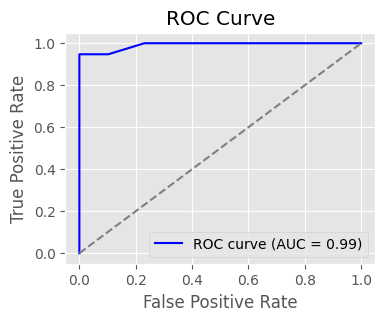

In [190]:

# Initialize Gradient Boosting Classifier with given parameters
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the evaluation metrics
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Value": [accuracy, precision, recall, f1, roc_auc]
})
print(metrics)

# Plot ROC Curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Feature Importance

In [191]:
# Train your GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns


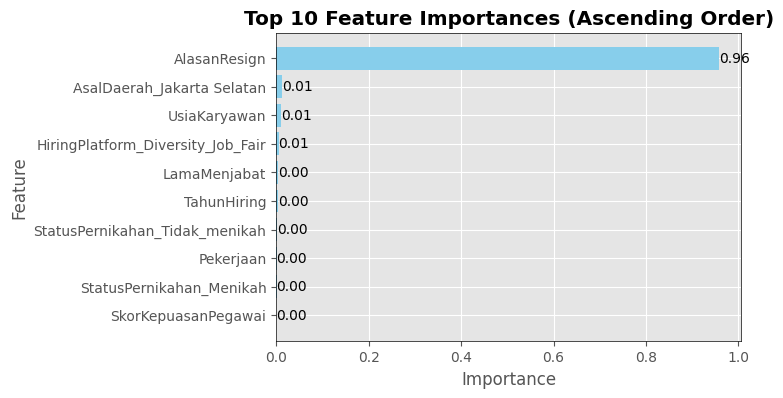

In [ ]:

# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in ascending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot the top 10 feature importances in a bar chart
top_features = sorted_feature_df.tail(10)  # Get the top 10 features
plt.figure(figsize=(6, 4))
bars = plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')

# Add border around the chart (spines)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(0.5)  # Set border thickness

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Ascending Order)', fontweight='bold')
plt.show()


from the plot above it is really explainatory because we reallly trying focus on how we try to improving retention prediction and the most feature importance there is, is actually AlasanResign (Resign Reason) and a worker from Jakarta selatan:

here are some of my assumptions and hypotheses that can be derived:

1. **`AlasanResign (Reason for Resignation)`**: The high importance of the "AlasanResign" feature suggests that the specific reasons employees provide for their resignation play a crucial role in predicting attrition. Assumptions related to this feature could include:
* Certain reasons, such as career advancement opportunities or dissatisfaction with the work environment, might be more strongly associated with resignations.

* Employees who resign due to personal reasons may exhibit different retention patterns compared to those resigning for professional growth.

2. **`AsalKota_Jakarta Selatan (Origin: South Jakarta)`**: The significance of the "AsalKota_Jakarta Selatan" feature implies that the geographic location of employees' origins is a noteworthy factor. Assumptions related to this feature may include:
* Employees from South Jakarta may face unique challenges or opportunities in their work environment, leading to different retention behaviors.

* Factors such as commute times or access to job opportunities in South Jakarta could affect employee retention.

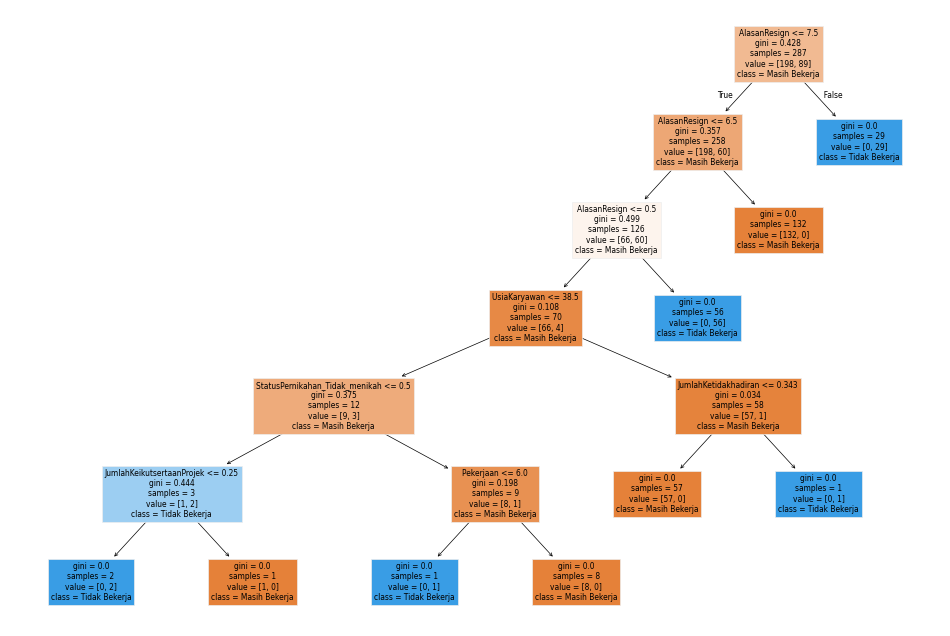

In [ ]:

X = df_encoded.drop(['StatusKerja'], axis=1)
y = df_encoded['StatusKerja']

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Masih Bekerja", "Tidak Bekerja"])
plt.show()